<a href="https://colab.research.google.com/github/Deepika441/CV/blob/main/2D_to_3D_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

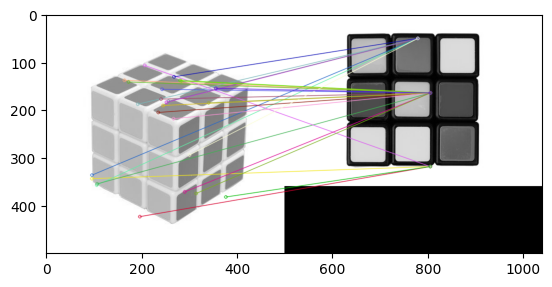

''

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load images
img1 = cv2.imread('cube1.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('cube2.jpeg', cv2.IMREAD_GRAYSCALE)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Match descriptors using FLANN matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)  # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Store all the good matches as per Lowe's ratio test.
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_matches)
plt.show()

# Extract location of good matches
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)

# Find the essential matrix
E, mask = cv2.findEssentialMat(pts1, pts2, focal=1.0, pp=(0., 0.), method=cv2.RANSAC, prob=0.999, threshold=1.0)

# Recover pose
_#, R, t, mask = cv2


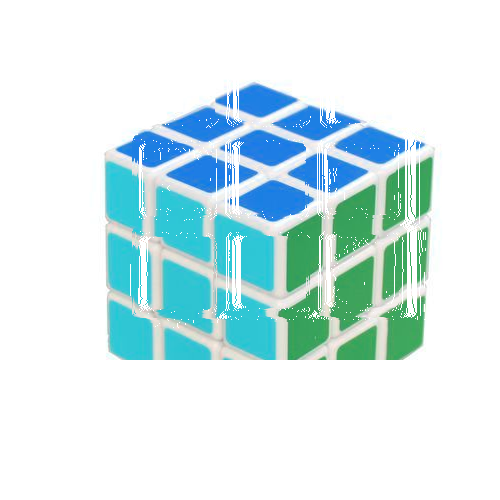

In [ ]:
from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def shift_image(img, depth_img, shift_amount=10):
	# Ensure base image has alpha
	img = img.convert("RGBA")
	data = np.array(img)

	# Ensure depth image is grayscale (for single value)
	depth_img = depth_img.convert("L")
	depth_data = np.array(depth_img)
	deltas = ((depth_data / 255.0) * float(shift_amount)).astype(int)

	# This creates the transparent resulting image.
	# For now, we're dealing with pixel data.
	shifted_data = np.zeros_like(data)

	height, width, _ = data.shape

	for y, row in enumerate(deltas):
		for x, dx in enumerate(row):
			if x + dx < width and x + dx >= 0:
				shifted_data[y, x + dx] = data[y, x]

	# Convert the pixel data to an image.
	shifted_image = Image.fromarray(shifted_data.astype(np.uint8))

	return shifted_image

img = Image.open("cube1.jpeg")
depth_img = Image.open("cube2.jpeg")
shifted_img = shift_image(img, depth_img, shift_amount=10)
#shifted_img.show()
shifted_img_array = np.array(shifted_img)
cv2_imshow(shifted_img_array)
cv2.waitKey(0)  # Wait for a key press
cv2.destroyAllWindows()  # Close the image window
